<font color='white' size=6>**<span style='background:midnightblue'>Predicting Sales based on Marketing Budgets 
        by Nathaniel Cekay    </span>**</font>

#View the full project at:
https://www.kaggle.com/code/natecekay/predicting-sales-based-on-marketing-budgets

#Introduction

In this project, I utilize machine learning to forecast total sales based on marketing budget data. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from joblib import dump
from joblib import load
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
np.random.seed(42)

#Data-Cleansing

In [3]:
df = pd.read_csv('/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv')

In [4]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.isna().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#Data-Visualization

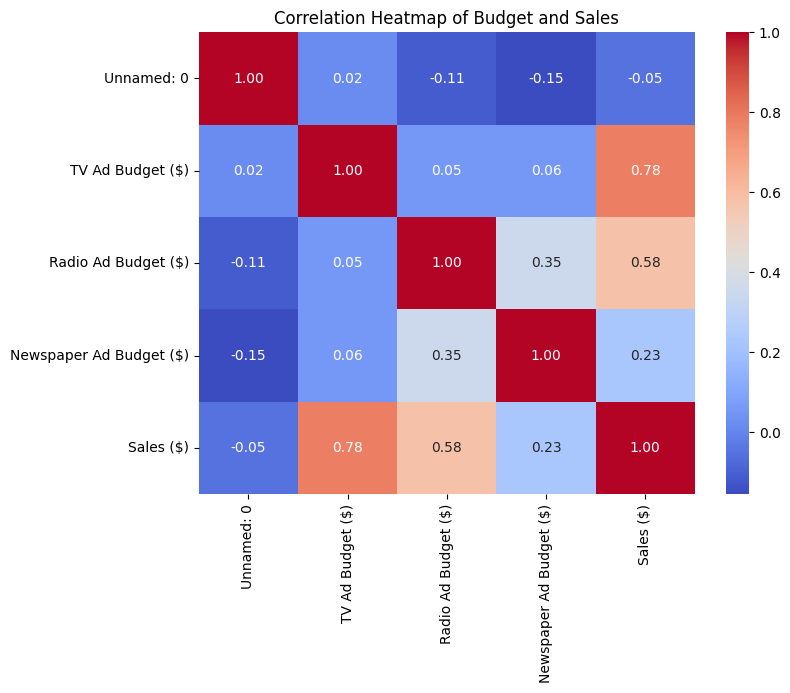

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap of Budget and Sales")
plt.show()

In [8]:
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


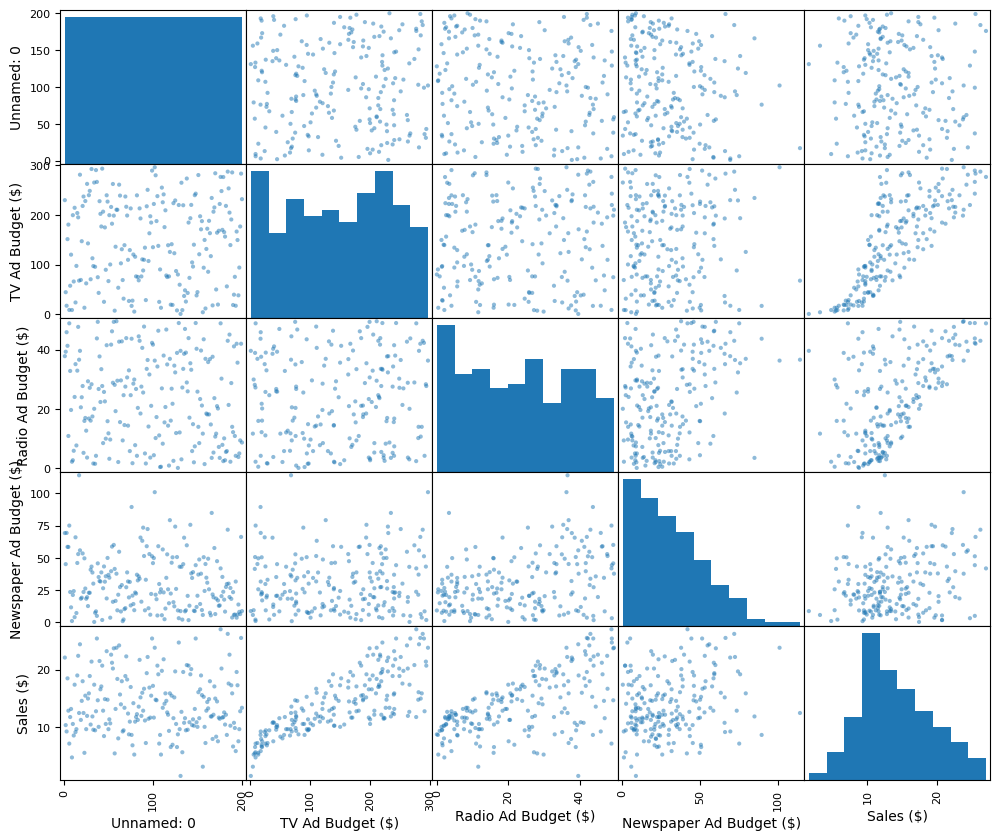

In [9]:
attributes = ["Unnamed: 0", "TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)",
              "Sales ($)"]


scatter_matrix(df[attributes], figsize=(12, 10))
plt.show()

#Machine-Learning-Model-Training-And-Evaluation

In [10]:
X = df.drop(columns=["Sales ($)"])
y = df["Sales ($)"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
pipeline = make_pipeline(poly, LinearRegression())
pipeline.fit(X_train_scaled, y_train)


model = pipeline

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

train_predictions = model.predict(X_train_scaled)
val_predictions = model.predict(X_val_scaled)
test_predictions = model.predict(X_test_scaled)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

train_r2 = r2_score(y_train, train_predictions)
val_r2 = r2_score(y_val, val_predictions)
test_r2 = r2_score(y_test, test_predictions)

avg_r2 = (train_r2 + val_r2 + test_r2) / 3
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Train RMSE:", train_rmse)
print("Train R-squared:", train_r2)
print("\nValidation RMSE:", val_rmse)
print("Validation R-squared:", val_r2)
print("\nTest RMSE:", test_rmse)
print("Test R-squared:", test_r2)
print("\nAverage R-squared:", avg_r2)
print("Cross-Validation RMSE:", (-scores.mean())**0.5)

Train RMSE: 0.9767958858752315
Train R-squared: 0.9659069754429676

Validation RMSE: 0.8816218075031983
Validation R-squared: 0.9578648122400895

Test RMSE: 0.9258291593683982
Test R-squared: 0.9728434081642938

Average R-squared: 0.9655383986157835
Cross-Validation RMSE: 1.1935957497349767


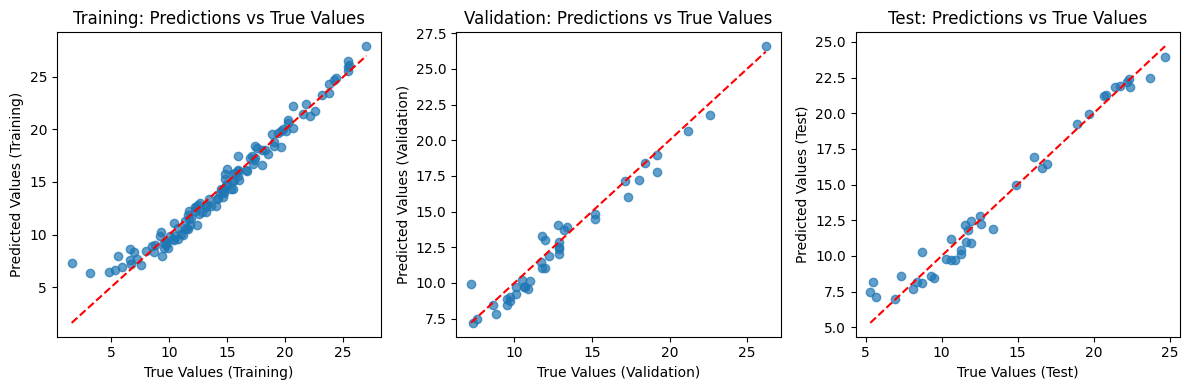

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_train, train_predictions, alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training: Predictions vs True Values")

plt.subplot(1, 3, 2)
plt.scatter(y_val, val_predictions, alpha=0.7)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel("True Values (Validation)")
plt.ylabel("Predicted Values (Validation)")
plt.title("Validation: Predictions vs True Values")

plt.subplot(1, 3, 3)
plt.scatter(y_test, test_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Test: Predictions vs True Values")

plt.tight_layout()
plt.show()

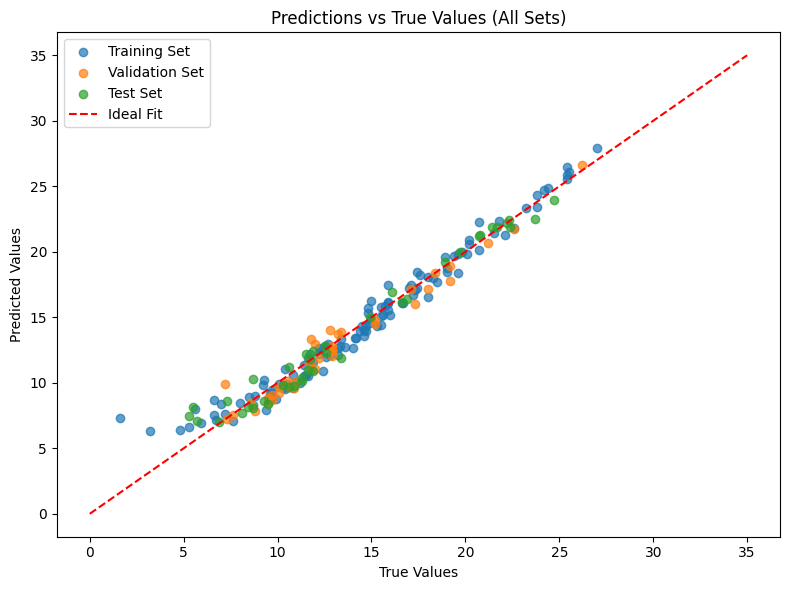

In [16]:
plt.figure(figsize=(8, 6))

plt.scatter(y_train, train_predictions, alpha=0.7, label="Training Set")
plt.scatter(y_val, val_predictions, alpha=0.7, label="Validation Set")
plt.scatter(y_test, test_predictions, alpha=0.7, label="Test Set")
plt.plot([0, 35], [0, 35], color='red', linestyle='--', label="Ideal Fit")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs True Values (All Sets)")
plt.legend()
plt.tight_layout()
plt.show()

#Conclusion

The model is performing well with an average R-squared score of 0.96. With only minor differences between the training, validation, and test sets, the model is not overfitting. The Cross-Validation RMSE is close to the training and test RMSE, again confirming the model is not overfitting. These scores confirm the final model's efficacy in predicting an average of 96% of the variance in sales based on marketing budgets.  